Author: Shariq Shaikh

Domain: Data Science

Batch: April 2025

Task: TITANIC SURVIVAL PREDICTION

Aim: To build a model that predicts whether a passenger on the Titanic survived or not

In [189]:
#Importing libraries

import pandas as pd # to help us import the dataset
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [191]:
#to Import the dataset
T1data = pd.read_csv('Titanic-Dataset.csv')

In [193]:
#to view the dataset
T1data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [195]:
# to shows how many columns and rows are present
T1data.shape

(891, 12)

In [197]:
T1data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In the age count it says 714.000000 count where as there 891 number of people so it is clear there are few missing values in the age column

In [200]:
#to show the age
T1data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

as you can see that there are null values

In [203]:
T1data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

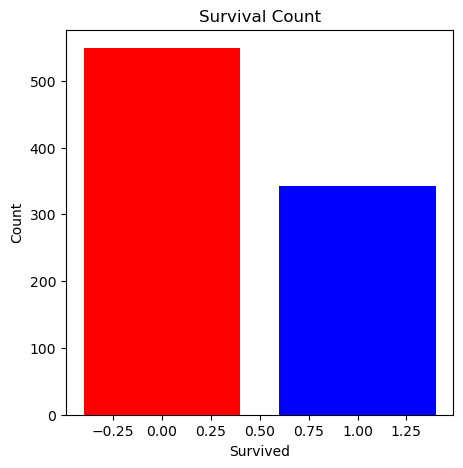

In [205]:
"""
 inorder to show the graph of how many people survived we need two values for the y axis and the x-axis
 y-axis = number of people
 x-axis = people who were able to survive or not 
 
"""

plt.figure(figsize=(5,5))

#T1data['Survived'].value_counts().index gets the unique values of the Survived column.
#T1data['Survived'].value_counts().values gets the counts for each unique value in the Survived column
plt.bar(T1data['Survived'].value_counts().index, T1data['Survived'].value_counts().values, color=["r", "b"])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

In [207]:
T1data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

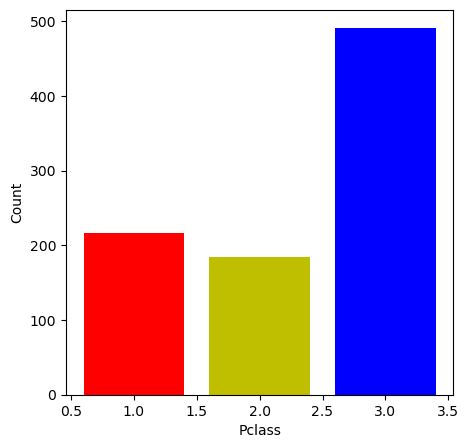

In [209]:
plt.figure(figsize=(5,5))
plt.bar(T1data['Pclass'].value_counts().index, T1data['Pclass'].value_counts().values, color=["b", "r", "y"])
plt.xlabel('Pclass')  
plt.ylabel('Count')
plt.show

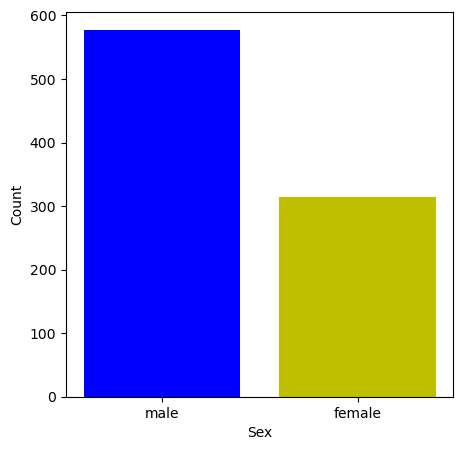

In [211]:
plt.figure(figsize=(5,5))
plt.bar(T1data['Sex'].value_counts().index, T1data['Sex'].value_counts().values, color=["b", "y"])
plt.xlabel('Sex')  
plt.ylabel('Count')
plt.show()

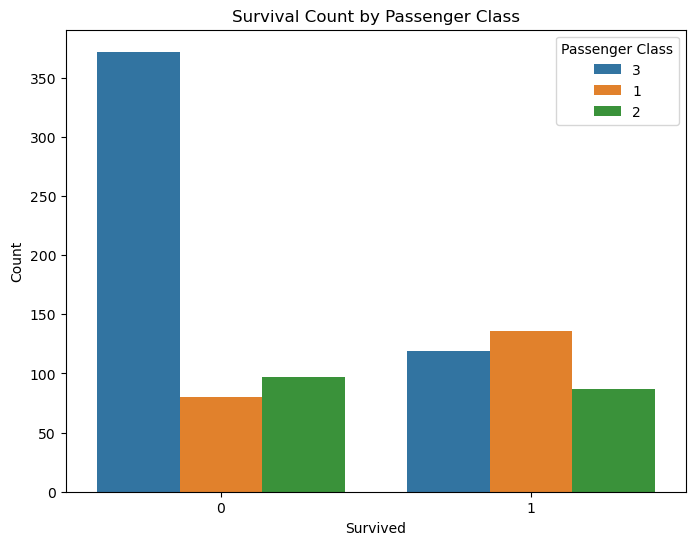

In [213]:
#lets visualize the count of survivals with Pclass
#sns.countplot(x=T1data['Survived'], hue=T1data['Pclass'])

import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Check and correct data types
T1data['Survived'] = T1data['Survived'].astype(str)  # Convert to string to avoid any int issues in plotting
T1data['Pclass'] = T1data['Pclass'].astype(str)  # Convert to string to avoid any int issues in plotting

# Plotting the data
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=T1data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Passenger Class')
plt.show()

In [215]:
T1data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
[0 1]
['male' 'female']
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
        Survived
Sex             
female  0.742038
male    0.188908


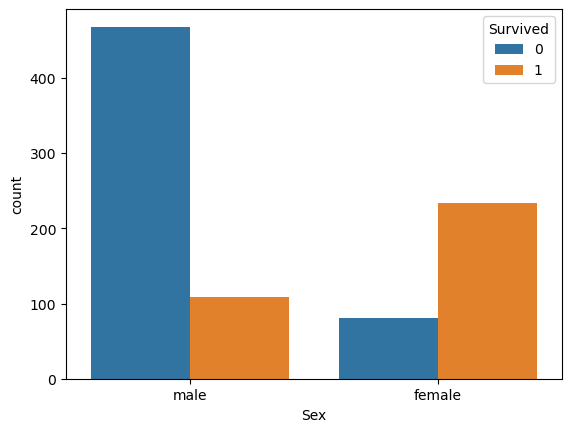

In [217]:
#lets visualize the count of survivals with Gender
sns.countplot(x=T1data['Sex'], hue=T1data['Survived'])#look at survival rate by sex
#T1data.groupby('Sex')[['Survived']].mean()

# Convert 'Survived' back to numeric (int)
T1data['Survived'] = pd.to_numeric(T1data['Survived'], errors='coerce')

# Verify the data types and unique values
print(T1data.dtypes)
print(T1data['Survived'].unique())
print(T1data['Sex'].unique())
# Check for any non-numeric values in 'Survived'
print(T1data[T1data['Survived'].isnull()])
# Perform the groupby operation
survival_rate_by_sex = T1data.groupby('Sex')[['Survived']].mean()
print(survival_rate_by_sex)

In [219]:
#look at survival rate by sex
#T1data.groupby('Sex')[['Survived']].mean()

# Perform the groupby operation
survival_rate_by_sex = T1data.groupby('Sex')[['Survived']].mean()
print(survival_rate_by_sex)

        Survived
Sex             
female  0.742038
male    0.188908


In [221]:
T1data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [223]:
#before doing the model , first change the gender from Male and female to 0 and 1 

from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

T1data['Sex'] = LabelEncoder.fit_transform(T1data['Sex'])

T1data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [225]:
T1data['Sex'], T1data['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
[1 0]
['0' '1']


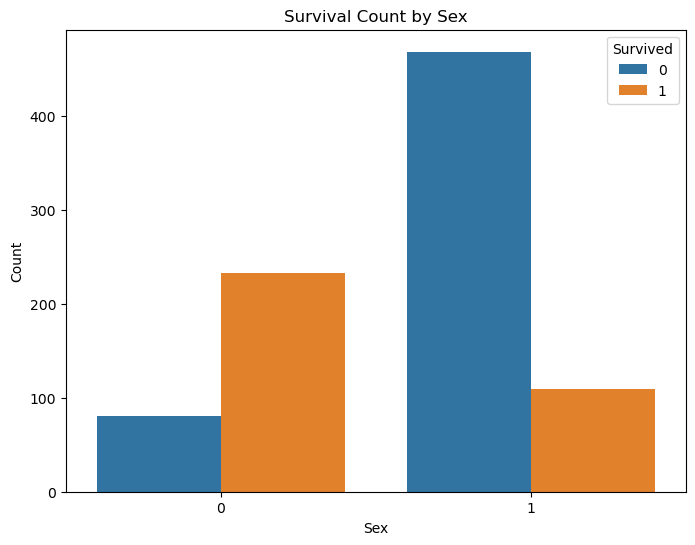

In [227]:
#lets visualize the count of survivals with Gender

import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Ensure the data types are correct
T1data['Survived'] = T1data['Survived'].astype('str')
T1data['Sex'] = T1data['Sex'].astype('int')

# Check if there are any incorrect data types or values
print(T1data.dtypes)
print(T1data['Sex'].unique())
print(T1data['Survived'].unique())

# Correct way to plot using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=T1data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Survived')
plt.show()

In [229]:
T1data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
#After dropping non required column
T1data=T1data.drop(['Age'], axis=1)

In [233]:
T1data_final = T1data
T1data_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,237736,30.0708,NaN,C


MODEL TRAINING

In [236]:
x= T1data[['Pclass', 'Sex']]
y=T1data['Survived']

In [238]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state =0)

In [240]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(x_train, y_train)

LogisticRegression(random_state=0)

MODEL PREDICTION

In [243]:
pred = print(log.predict(x_test))

['0' '0' '0' '1' '1' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '0'
 '0' '0' '0' '1' '0' '0' '1' '1' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0'
 '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '0'
 '0' '0' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '0' '1' '0' '1' '0' '1' '0' '1' '1' '1' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '1'
 '1' '1' '0' '1' '1' '0' '0' '1' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0'
 '1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '0' '1' '0' '0']


In [245]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: object


In [249]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,1]])

if(res==0):
    print("so sorry! Not Survived")
else:
    print("Survived")

Survived
